In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils

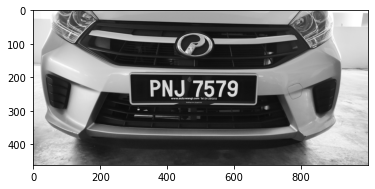

In [2]:
img = cv2.imread('a10.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

In [3]:
# bfilter = cv2.bilateralFilter(gray, 20, 40, 40)
# _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
# adapThresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 4)
# edged = cv2.Canny(bfilter, 30, 200)

# plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [4]:
se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
bg=cv2.morphologyEx(gray, cv2.MORPH_DILATE, se)
out_gray=cv2.divide(gray, bg, scale=255)
out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU)[1]
bfilter1 = cv2.bilateralFilter(out_binary, 20, 40, 40)
edged = cv2.Canny(out_binary, 100, 200)

In [5]:
cv2.imshow('binary', out_binary)
cv2.imshow('gray', edged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [8]:
location

array([[[788,  88]],

       [[773,  73]],

       [[536,  84]],

       [[542, 101]]], dtype=int32)

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

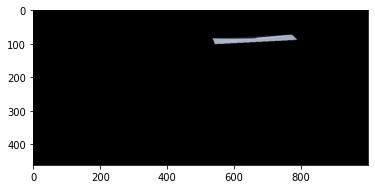

In [10]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [11]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

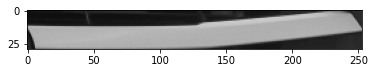

In [12]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))